In [20]:
import os
import zipfile
import numpy as np
from google.colab import files
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
fire_dir = os.path.join('/content/drive/MyDrive/AIDER/fire')
non_emergency_dir = os.path.join('/content/drive/MyDrive/AIDER/normal')
injury_dir = os.path.join('/content/drive/MyDrive/AIDER/injury')

print('total training fire images:', len(os.listdir(fire_dir)))
print('total training non-emergency images:', len(os.listdir(non_emergency_dir)))
print('total training injury images:', len(os.listdir(injury_dir)))

fire_files = os.listdir(fire_dir)
non_emergency_files = os.listdir(non_emergency_dir)
injury_files = os.listdir(injury_dir)

total training fire images: 521
total training non-emergency images: 4399
total training injury images: 407


(360, 360, 3)


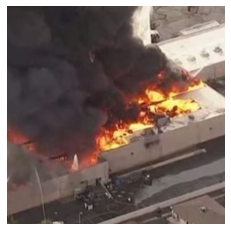

(360, 399, 3)


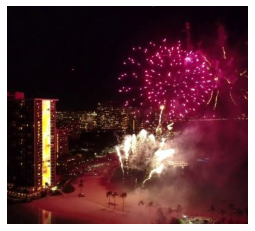

(900, 600, 3)


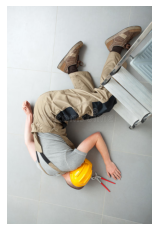

In [ ]:
pic_index = 10

next_fire = [os.path.join(fire_dir, fname) 
             for fname in fire_files[pic_index-1:pic_index]]
next_nonEmergency = [os.path.join(non_emergency_dir, fname) 
                     for fname in non_emergency_files[pic_index-1:pic_index]]
next_injury = [os.path.join(injury_dir, fname) 
              for fname in injury_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_fire + next_nonEmergency + next_injury):
  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
DIRECTORY = "/content/drive/MyDrive/AIDER/"

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

train_generator = training_datagen.flow_from_directory(
	DIRECTORY,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = training_datagen.flow_from_directory(
	DIRECTORY,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Number of classes
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, 
                    validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("kj_model.h5")

Found 5811 images belonging to 4 classes.
Found 5811 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

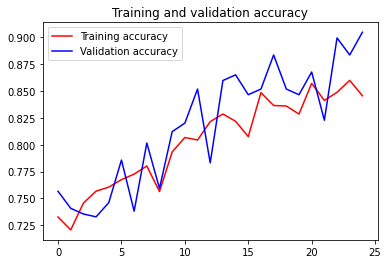

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving An-empty-st.jpg to An-empty-st.jpg
Saving 1004465108.jpg to 1004465108 (7).jpg
Saving You are the help_tourniquet_hero.jpg to You are the help_tourniquet_hero (7).jpg
An-empty-st.jpg


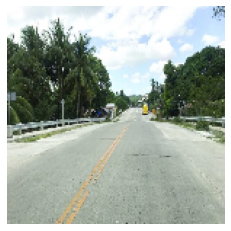

('normal', 2)
1004465108.jpg


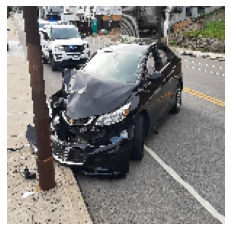

('traffic_incident', 3)
You are the help_tourniquet_hero.jpg


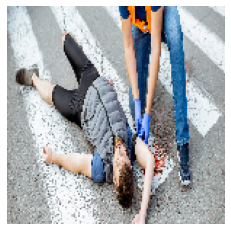

('injury', 1)


In [23]:
uploaded = files.upload()
model = keras.models.load_model('/content/drive/MyDrive/kj_model.h5')

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)

  plt.imshow(img)
  plt.axis('Off')
  plt.show()

  count = 0
  for i in classes[0]:
    if i == 1:
      print(list(train_generator.class_indices.items())[count])
    count += 1